<a href="https://colab.research.google.com/github/amirhbv/UT-AI-Spring99-CAs/blob/master/CA0/CA0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


## Part 1
First we load csv file as DataFrame using pandas library.

The DataFrame consists of 9 columns, `Serial No.` is the key and `Chance of Admit` is the column going to be predicted.


In [0]:
df = pd.read_csv("AdmissionPredict.csv")
keyColumn = 'Serial No.'
predictColumn = 'Chance of Admit'

The head method gives us the first n(by default 5) rows of DataFrame and its header.

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65


The tail method gives us the last n(by default 5) rows of DataFrame and its header.

In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324.0,110.0,3,3.5,3.5,9.04,1,0.82
396,397,325.0,107.0,3,3.0,3.5,9.11,1,NaN
397,398,330.0,116.0,4,5.0,4.5,9.45,1,0.91
398,399,312.0,103.0,3,3.5,4.0,8.78,0,0.67
399,400,333.0,117.0,4,5.0,4.0,9.66,1,0.95


The describe method generates descriptive statistics from DataFrame.

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,378.000000,380.000000,400.000000,400.000000,400.000000,380.000000,400.000000,384.000000
mean,200.500000,316.759259,107.386842,3.087500,3.400000,3.452500,8.604737,0.547500,0.724375
std,115.614301,11.415599,6.048645,1.143728,1.006869,0.898478,0.599167,0.498362,0.142964
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.250000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


The info method prints a concise summary of a DataFrame including dtypes, non-null values count and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            378 non-null float64
TOEFL Score          380 non-null float64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 380 non-null float64
Research             400 non-null int64
Chance of Admit      384 non-null float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


This part of code gives us count of NaN values in columns.

In [7]:
df.isna().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

Then we replace NaN values with mean of column except for `Chance of Admit` columns as that is the test data. 

In [8]:
columnsWithNan = df.columns[df.isna().any()].tolist()
columnsWithNan.remove(predictColumn)
df[columnsWithNan] = df[columnsWithNan].fillna(df.mean())

df.isna().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit      16
dtype: int64



---

## Part 2
Then we draw scatter plot for each column as horizontal coordinates of each point and `Chance of Admit` as vertical coordinates of each point.

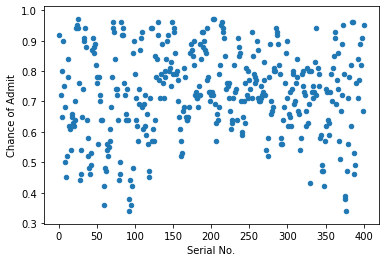

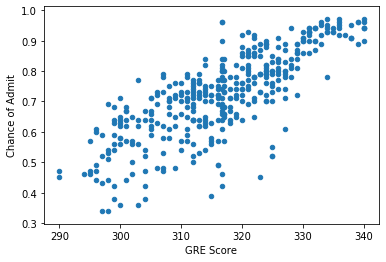

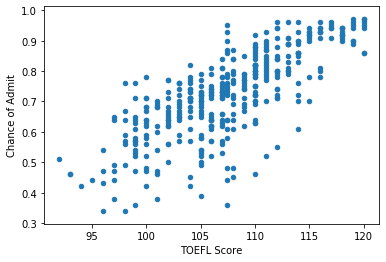

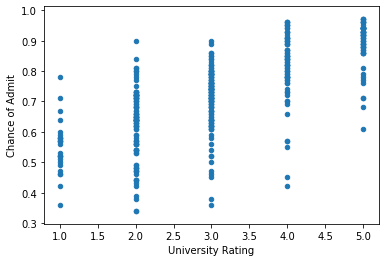

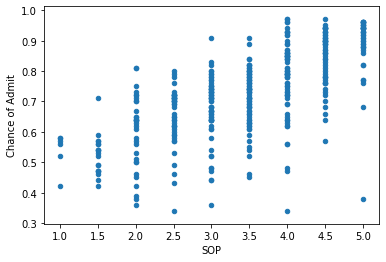

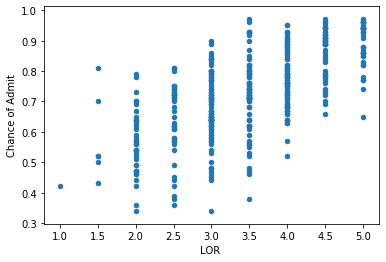

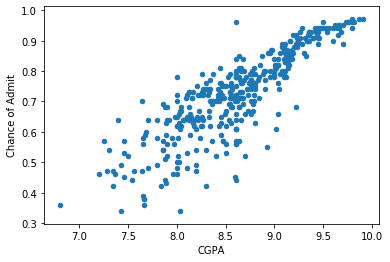

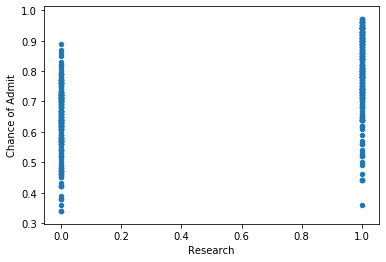

In [9]:
columns = list(df.columns)
columns.remove(predictColumn)

for column in columns:
    df.plot.scatter(x=column, y=predictColumn)


To Find the column that has the most correlation with `Chance of Admit` we use [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) which is a measure of the linear correlation between two variables.

Pearson's correlation coefficient for two variables X, Y can be calculated using this formula:

$$\rho_{X,Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

where
*   cov is [covariance](https://en.wikipedia.org/wiki/Covariance)
*   $\sigma_X$ is [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of $X$
*   $\sigma_Y$ is standard deviation of $Y$


Using this methid the `CGPA` has the most correlation with `Chance of Admit`.



In [10]:
df.corr(method='pearson')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.102867,-0.157648,-0.169948,-0.166932,-0.088221,-0.062254,-0.063138,0.047057
GRE Score,-0.102867,1.000000,0.803483,0.659972,0.599892,0.544010,0.794507,0.572454,0.785166
TOEFL Score,-0.157648,0.803483,1.000000,0.681877,0.633790,0.555354,0.799066,0.498658,0.758534
University Rating,-0.169948,0.659972,0.681877,1.000000,0.734523,0.660123,0.733424,0.447783,0.707191
SOP,-0.166932,0.599892,0.633790,0.734523,1.000000,0.729593,0.695528,0.444029,0.680752
LOR,-0.088221,0.544010,0.555354,0.660123,0.729593,1.000000,0.660742,0.396859,0.663452
CGPA,-0.062254,0.794507,0.799066,0.733424,0.695528,0.660742,1.000000,0.514092,0.855675
Research,-0.063138,0.572454,0.498658,0.447783,0.444029,0.396859,0.514092,1.000000,0.548443
Chance of Admit,0.047057,0.785166,0.758534,0.707191,0.680752,0.663452,0.855675,0.548443,1.000000




---

## Part 3
In this part First we count number of students with `CGPA` equal to or greater than 9 and `TOEFL Score` of at least 110.

In [11]:
numberOfStudents, _ = df[(df['CGPA'] >= 9) & (df['TOEFL Score'] >= 110)].shape
numberOfStudents

97

Then we calculate mean value of `GRE Score` based on `University Rating`.

In [12]:
df.groupby(['University Rating']).mean()['GRE Score']

University Rating
1    303.153846
2    309.752856
3    315.934698
4    324.075075
5    327.954630
Name: GRE Score, dtype: float64



---
## Part 4
Here we want to find a linear estimator for `Chance of Admit` based on `CGPA`.

First we remove other columns from DataFrame. Then we drop NaN values to get the train data as a DataFrame.


In [0]:
x, y = 'CGPA', predictColumn
df = df[[keyColumn, x, y]]
trainDf = df.dropna()

Our hypothsis function is:
$$ h_{\theta}(x) = mx + b $$
and our cost function is MSE that has **this** formula:
$$ J(b, m) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2$$
where m is count of train data.

In [0]:
xBar = trainDf[x].mean()
yBar = trainDf[y].mean()
x2Bar = (trainDf[x] * trainDf[x]).mean()
xyBar = (trainDf[x] * trainDf[y]).mean()

To find the best values for m and b with minimum error I used [this](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/) method.

First we try to simplify the formula for MSE:
$$ MSE = \frac{(y_1 - (mx_1 + b))^2 + (y_2 - (mx_2 + b))^2 + \dots + (y_m - (mx_m + b))^2}{2m} $$

By opening brackets and some manipulation we get:

$$ MSE = \frac{(y_1^2 + \dots + y_n^2) - 2m(x_1y_1 + \dots + x_my_m) - 2b(y_1 + \dots + y_m) + m^2(x_1^2 + \dots + x_m^2) + 2mb(x_1 + \dots + x_m) + nb^2}{2m} $$

We can rewrite formula as this:
$$ 2 * MSE = \overline{y^2} - 2m\overline{xy} - 2b\overline{y} + m^2\overline{x^2} + 2mb\overline{x} + b^2$$

where
$$ \overline{y} = \frac{y_1 + y_2 + \dots + y_m}{m} $$
$$ \overline{x} = \frac{x_1 + x_2 + \dots + x_m}{m} $$
$$ \overline{y^2} = \frac{y_1^2 + y_2^2 + \dots + y_m^2}{m} $$
$$ \overline{x^2} = \frac{X_1^2 + x_2^2 + \dots + x_m^2}{m} $$
$$ \overline{xy} = \frac{x_1y_1 + x_2y_2 + \dots + x_my_m}{m} $$

As we are looking for minimum error we take partial derivatives and compare to 0.

$$ \frac{\partial MSE}{\partial m} = \frac{\partial MSE}{\partial b} = 0 $$

Which leads us to following formulas for m and b:
$$ m = \frac{\overline{xy} - \overline{x}\overline{y}}{\overline{x^2} - (\overline{x})^2} $$
$$ b = \overline{y} - m\overline{x} $$

where m is slope and b is y-intercept.

The above method gives us minimum error because at extremum values of a function the slope of tangent line becomes zero and we know that the derivative gives us the equation for slope of tangent line. So when we compare our derivate to zero we find extremums of our function. Our function is quadratic so it has only one extremum and because second derivative of function is positive so our function is upwardly concave and the only extremum of it is the minimum we are looking for.

In [0]:
m = (xyBar - xBar * yBar) / (x2Bar - xBar * xBar)
b = yBar - m * xBar

In [16]:
 m


0.20966222879497512

In [17]:
b

-1.0800003831374472

As you can see, with above values for m and b we have the following error.

In [18]:
numberOfRows, _ = trainDf.shape
mse = ((trainDf[x] * m + b - trainDf[y]) ** 2).sum() / (numberOfRows * 2)
mse

0.0027298283892873364

Then we draw the line we founded over scatter plot of train data to see how it fits.

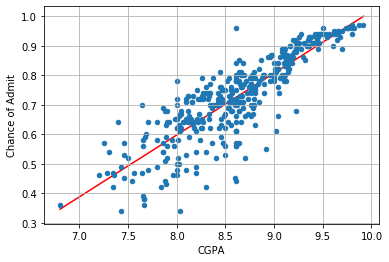

In [19]:
x_line = np.linspace(df[x].min(), df[x].max())
line = m * x_line + b

ax = df.plot.scatter(x, y, grid=True) 
ax.plot(x_line, line, zorder=-1, color='red')


At last we calculate the `Chance of Admit` for the test data using above hypothsis function.

In [20]:
testDf = df[df.isna().any(axis=1)]

pd.DataFrame({
    keyColumn: testDf[keyColumn],
    x: testDf[x],
    y: testDf[x].apply(lambda x: m * x + b)
})

,Serial No.,CGPA,Chance of Admit
1,2,8.87,0.779704
57,58,7.60,0.513433
135,136,8.77,0.758737
143,144,9.92,0.999849
171,172,9.07,0.821636
218,219,8.97,0.800670
232,233,8.27,0.653906
251,252,9.00,0.806960
272,273,7.64,0.521819
294,295,8.32,0.664389


The End.

---

